IMPORTING ALL THE NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import NaN, NAN, nan
from scipy.stats import chi2_contingency
from scipy.stats import zscore

**READING THE DATA SET**

In [2]:
df=pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# UNDERSTANDING AND CLEANING THE DATASET

It displays marks obtained by the students in high school from United States.
It consists of 1000 rows and 8 columns:

Columns:
1. gender:it tells the gender of student(male/female)
2. race/ethnicity:it tells which race student belong to.It has 5 groups from 'A' to 'E'
3. parental level of education:highest qualification of parents of the student.Ranging from high school to master's degree.
4. lunch: It is either standard/free
5. test preparation course: It tells if the student has taken the test preparation course or not.
6. math score: the student's math score from 0 to 100
7. reading score: the student's reading score from 0 to 100
8. writing score: the student's writing score from 0 to 100

**EXTRACTING TOP 5 ROWS FROM DATASET AND CHECKING FOR NO.OF ROWS AND COLUMNS**

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape
print('It has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

It has 1000 rows and 8 columns


**DATA TYPE OF EACH COLUMN**

In [10]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

**GETTING INFO ABOUT EACH COLUMN AND GETTING MATHEMATICAL CALCULATIONS FOR NUMERICAL COLUMNS**

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**FINDING NON-NULL VALUES FROM EACH COLUMN**

In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**FINDING NO.OF DUPLICATE VALUES**

In [9]:
df.duplicated().sum()

0

**CHECKING FOR THE OUTLIERS**

Box plot is the best method to check if any outliers are present in the given dataset.

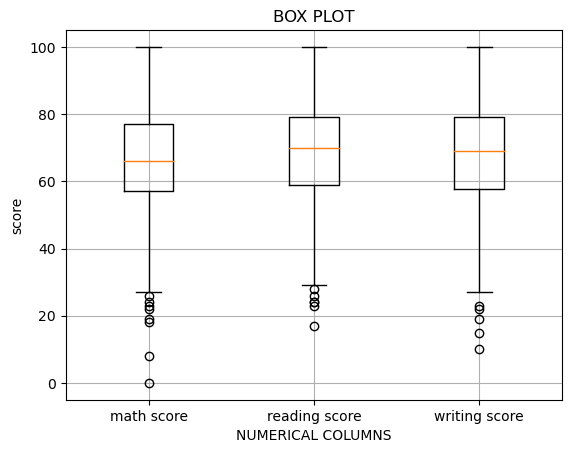

In [19]:
plt.boxplot([df['math score'],df['reading score'],df['writing score']],labels=['math score', 'reading score', 'writing score'])
plt.title('BOX PLOT')
plt.ylabel('score')
plt.xlabel('NUMERICAL COLUMNS')
plt.grid(True)
plt.show()

From the above box plot we can check if there is any score that is below zero or above 100 for all the numerical columns. 
There is no outlier present in this dataset.

If we want to get an accurate result we can do that by using the below code


In [21]:
math_outliers=df[(df['math score']<0)|(df['math score']>100)].size
read_outliers=df[(df['reading score']<0)|(df['reading score']>100)].size
write_outliers=df[(df['writing score']<0)|(df['writing score']>100)].size
tot_outliers=math_outliers+read_outliers+write_outliers
print('No.of outliers present in the dataset are:',tot_outliers)

No.of outliers present in the dataset are: 0


**We will add two more columns:'total score' and 'percentage' for each observation.Also give grade for each student**

In [22]:
df['total score']=df['math score']+df['reading score']+df['writing score']
df['percentage']=(df['total score']/300)*100
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,232,77.333333
6,female,group B,some college,standard,completed,88,95,92,275,91.666667
7,male,group B,some college,free/reduced,none,40,43,39,122,40.666667
8,male,group D,high school,free/reduced,completed,64,64,67,195,65.000000
9,female,group B,high school,free/reduced,none,38,60,50,148,49.333333


In [51]:
def assign_grade(percentage):
    if percentage>=90:
        return 'O'
    elif percentage>=80:
        return 'A'
    elif percentage>=70:
        return 'B'
    elif percentage>=60:
        return 'C'
    else:
        return 'F'

# Apply the assign_grade function to create the Grade column
df['Grade'] = df['percentage'].apply(assign_grade)
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,percentage,Grade
0,female,group B,bachelor's degree,standard,0,72.0,72.0,74.0,218.0,72.67,B
1,female,group C,some college,standard,1,69.0,90.0,88.0,247.0,82.33,A
2,female,group B,master's degree,standard,0,90.0,95.0,93.0,278.0,92.67,O
3,male,group A,associate's degree,free/reduced,0,47.0,57.0,44.0,148.0,49.33,F
4,male,group C,some college,standard,0,76.0,78.0,75.0,229.0,76.33,B
5,female,group B,associate's degree,standard,0,71.0,83.0,78.0,232.0,77.33,B
6,female,group B,some college,standard,1,88.0,95.0,92.0,275.0,91.67,O
7,male,group B,some college,free/reduced,0,40.0,43.0,39.0,122.0,40.67,F
8,male,group D,high school,free/reduced,1,64.0,64.0,67.0,195.0,65.00,C
9,female,group B,high school,free/reduced,0,38.0,60.0,50.0,148.0,49.33,F


**GET AVERAGE FOR EACH SUBJECT**

In [25]:
print('Average score for mathematics:',np.mean(df['math score']))
print('Average score for reading:',np.mean(df['reading score']))
print('Average score for writing:',np.mean(df['writing score']))

Average score for mathematics: 66.089
Average score for reading: 69.169
Average score for writing: 68.054


**In the above dataset for 'test preparation course' column we can replace the values present with numeric values**

In [125]:
df.replace({'none':0,'completed':1},inplace=True)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,percentage,Grade
0,female,group B,bachelor's degree,standard,0,72.0,72.0,74.0,218.0,72.67,B
1,female,group C,some college,standard,1,69.0,90.0,88.0,247.0,82.33,A
2,female,group B,master's degree,standard,0,90.0,95.0,93.0,278.0,92.67,O
3,male,group A,associate's degree,free/reduced,0,47.0,57.0,44.0,148.0,49.33,F
4,male,group C,some college,standard,0,76.0,78.0,75.0,229.0,76.33,B


**Now we will change the datatype of all the scores column to float and also round off the percentage column to 2 digits**

In [126]:
df['math score']=df['math score'].astype(float)
df['reading score']=df['reading score'].astype(float)
df['writing score']=df['writing score'].astype(float)
df['writing score']=df['writing score'].astype(float)
df['total score']=df['total score'].astype(float)

df['percentage'] = df['percentage'].round(2)

print(df.dtypes)
df.head()

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course          int64
math score                     float64
reading score                  float64
writing score                  float64
total score                    float64
percentage                     float64
Grade                           object
dtype: object


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,percentage,Grade
0,female,group B,bachelor's degree,standard,0,72.0,72.0,74.0,218.0,72.67,B
1,female,group C,some college,standard,1,69.0,90.0,88.0,247.0,82.33,A
2,female,group B,master's degree,standard,0,90.0,95.0,93.0,278.0,92.67,O
3,male,group A,associate's degree,free/reduced,0,47.0,57.0,44.0,148.0,49.33,F
4,male,group C,some college,standard,0,76.0,78.0,75.0,229.0,76.33,B


**Getting unique value counts for each column**

In [52]:
print(df['gender'].value_counts())
print(df['race/ethnicity'].value_counts())
print(df['parental level of education'].value_counts())
print(df['lunch'].value_counts())
print(df['test preparation course'].value_counts())
print(print(df['Grade'].value_counts()))

gender
female    518
male      482
Name: count, dtype: int64
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
test preparation course
0    642
1    358
Name: count, dtype: int64
Grade
F    285
B    261
C    256
A    146
O     52
Name: count, dtype: int64
None


# PERFORMING EDA

**Distribution of Key Variables Using Histograms**

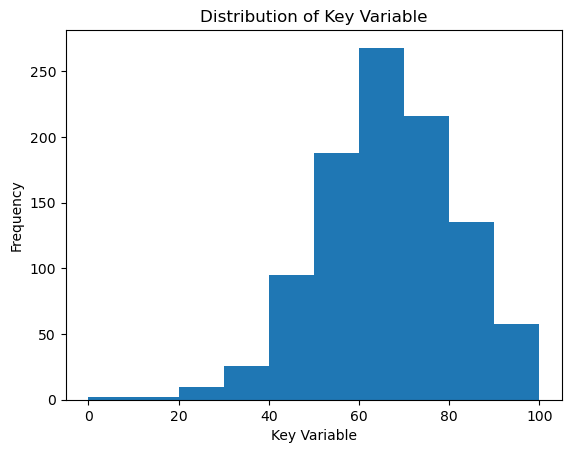

In [59]:
plt.hist(df['math score'])
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.title('Distribution of math score')
plt.show()

It tells us that there are many people whose maths score is between 60 and 80

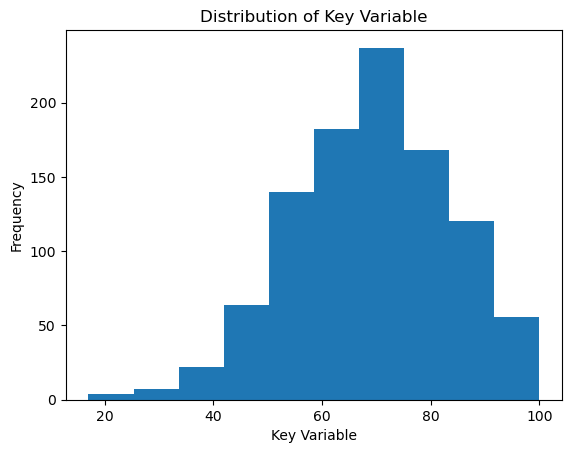

In [60]:
plt.hist(df['reading score'])
plt.xlabel('reading score')
plt.ylabel('Frequency')
plt.title('Distribution of reading score')
plt.show()

It tells us that there are many people whose reading score is between 60 and 70

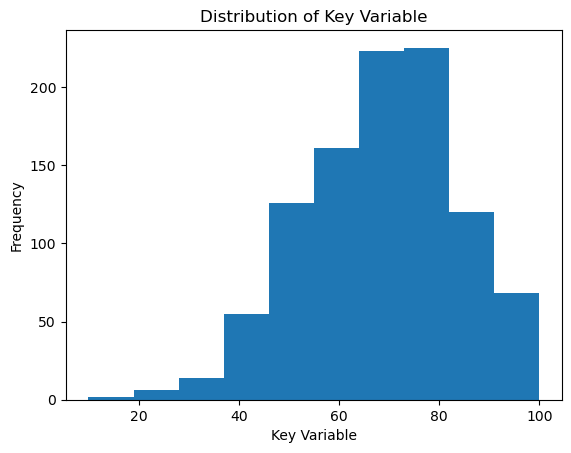

In [61]:
plt.hist(df['writing score'])
plt.xlabel('writing score')
plt.ylabel('Frequency')
plt.title('Distribution of writing score')
plt.show()

It tells us that there are many people whose writing score is between 70 and 80

**Relationships Between Variables Using Scatter Plots and Correlation Matrices**

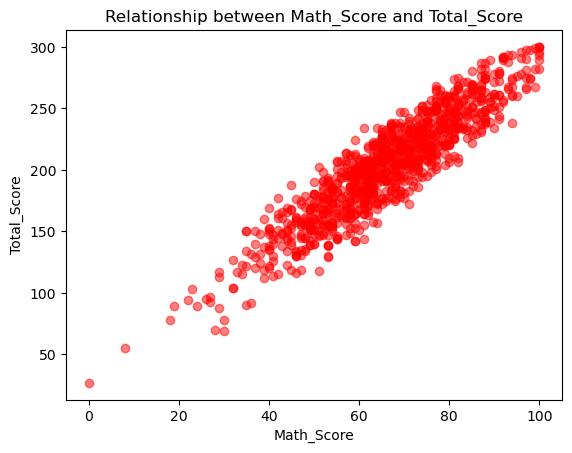

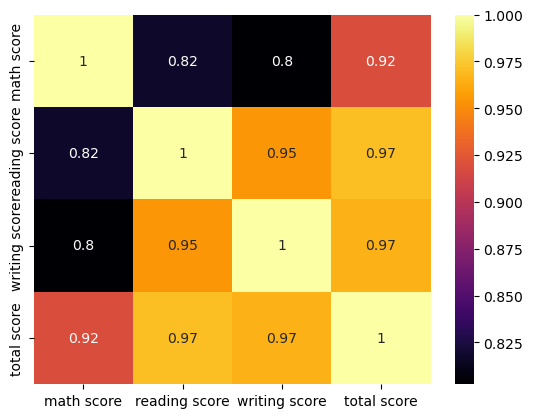

In [68]:
plt.scatter(df['math score'], df['total score'], color='red', alpha=0.5)
plt.xlabel('Math_Score')
plt.ylabel('Total_Score')
plt.title('Relationship between Math_Score and Total_Score')
plt.show()

cols = ['math score', 'reading score', 'writing score','total score']
correlation_matrix = df[cols].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='inferno')
plt.show()

The above scatter plot shows strong positive correlation between both the variables.A student whose score is good in mathematics has a higher chance of getting a good score in his total.
We can also check the samething from correlation matrix.Here it shows a value of 0.92 which suggests a strong positive correlation.It can also be seen that Student who is good in writing is also good in reading.

**Group Comparisons Using Box Plots and Bar Charts**

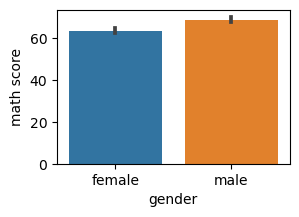

In [78]:
plt.figure(figsize=(3,2))
sns.barplot(x = 'gender', y = 'math score', data = df)
plt.show()

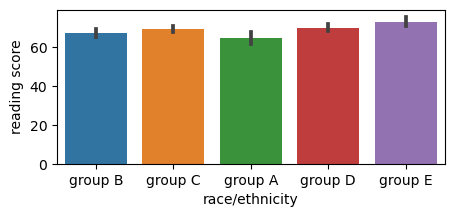

In [83]:
plt.figure(figsize=(5,2))
sns.barplot(x = 'race/ethnicity', y = 'reading score', data = df)
plt.show()

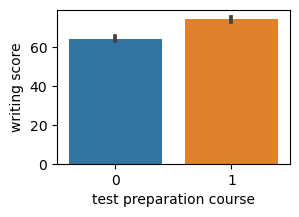

In [81]:
plt.figure(figsize=(3,2))
sns.barplot(x = 'test preparation course', y = 'writing score', data = df)
plt.show()

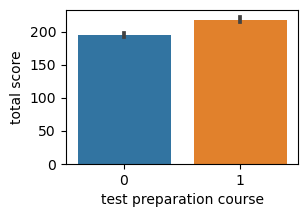

In [111]:
plt.figure(figsize=(3,2))
sns.barplot(x = 'test preparation course', y = 'total score', data = df)
plt.show()

The above bar plots represent relation between math score and gender,reading score and race,writing score and test preparation course.It also conveys those who have taken the test prep course got a good total.

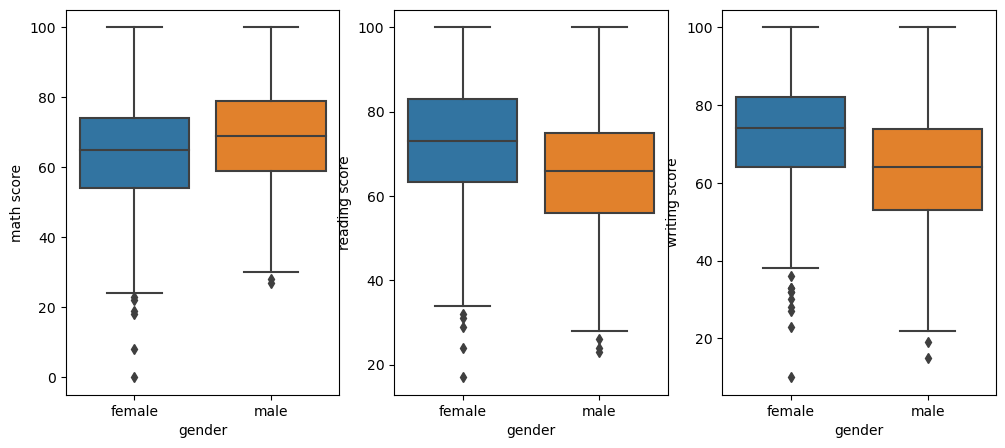

In [91]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'gender', y = 'math score', data = df)
plt.subplot(1,3,2)
sns.boxplot(x = 'gender', y = 'reading score', data = df)
plt.subplot(1,3,3)
sns.boxplot(x = 'gender', y = 'writing score', data = df)
plt.show()

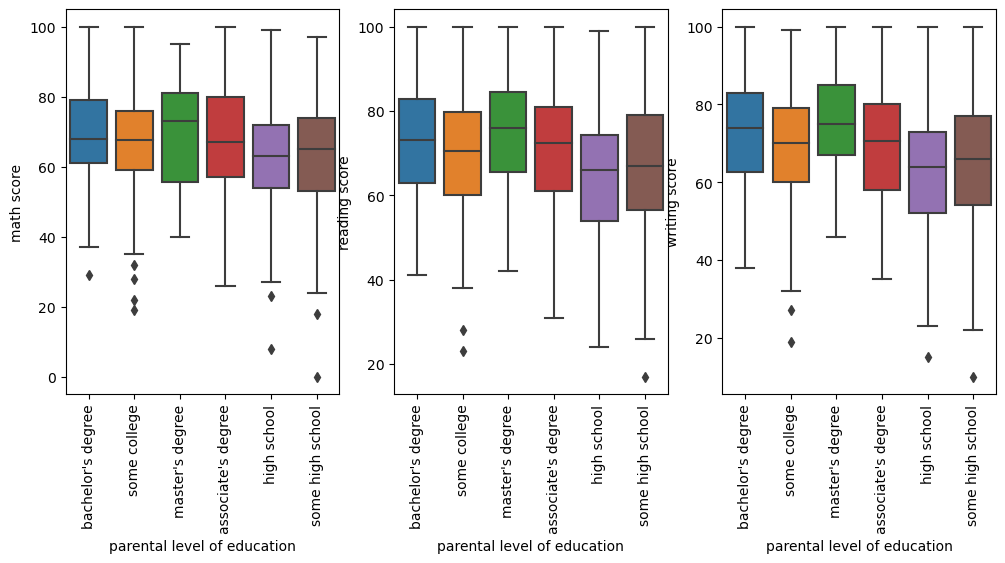

In [96]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'parental level of education', y = 'math score', data = df)
plt.xticks(rotation = 90)
plt.subplot(1,3,2)
sns.boxplot(x = 'parental level of education', y = 'reading score', data = df)
plt.xticks(rotation = 90)
plt.subplot(1,3,3)
sns.boxplot(x = 'parental level of education', y = 'writing score', data = df)
plt.xticks(rotation = 90)
plt.show()

The above box plots shows how male students and female students scored in each of the three scoring columns and also how parental level of education is related to the students score.Box plots can also be used to find median,lowest and highest values from the graph.

# Statistical Inference

**Hypothesis**

1.)Null:Student who has taken test prep course will not get good total

Alternative:Student who has taken test prep course will get good total

2.)Null:Student who is good in writing is also good in reading

Alternative:Student who is good in writing not well in writing*

In [102]:
cont_table=pd.crosstab(df['test preparation course'],df['total score'])
chi2,p, _, _ = chi2_contingency(cont_table)
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Chi-squared value: 237.3069873983569
P-value: 0.016344050879986458


Here, pvalue is less than 0.05 which tells us that we should reject null hypothesis.Therefore it matches with eda finding in which it tells us that student with test prep course will get good grades.

In [115]:
from scipy import stats
t_statistic, p_value = stats.ttest_ind(df['writing score'],df['reading score'])
print('p value using t test is:',p_value)

p value using t test is: 0.09444482452690019


Here, pvalue is greater than 0.05 which tells us that we fail to reject null hypothesis.Therefore it matches with eda finding in which it tells us that student who is good in writing is also good in reading.

# Visualization and Presentation of Findings

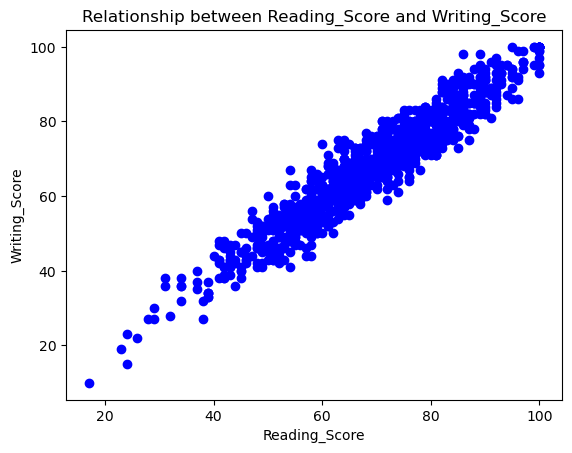

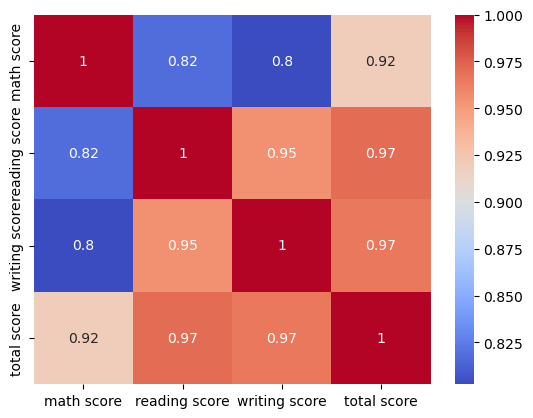

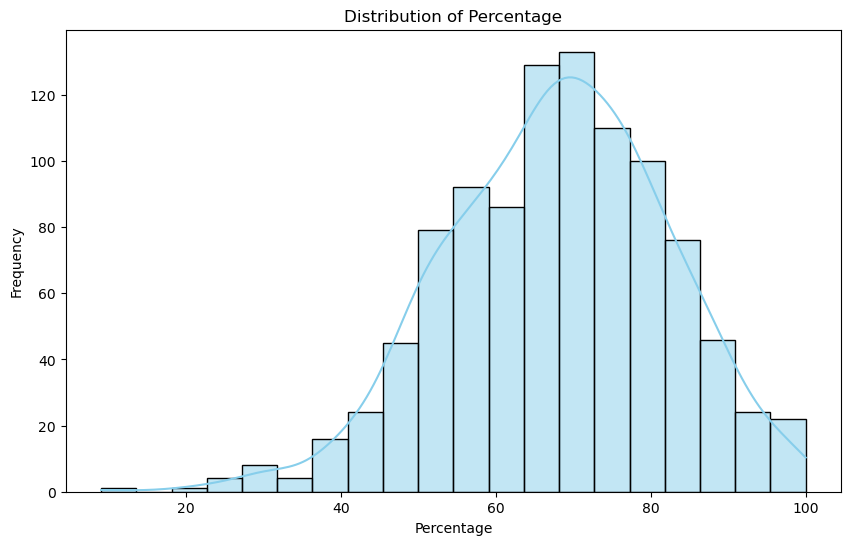

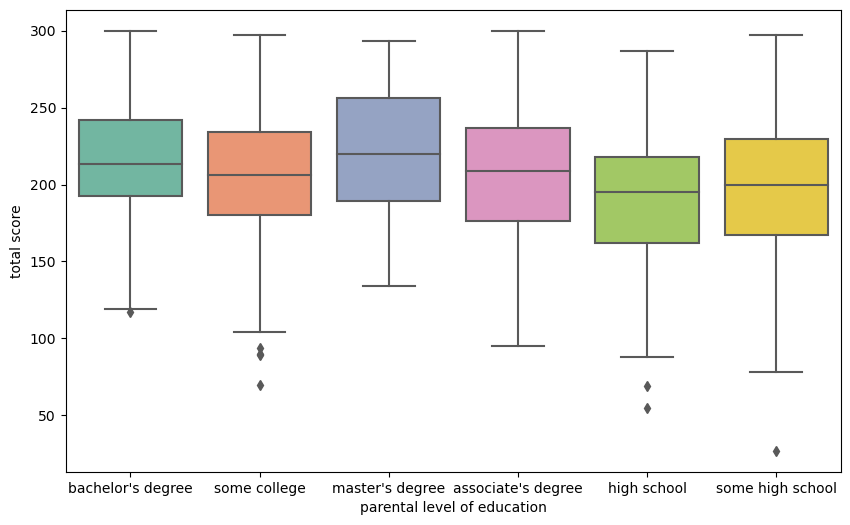

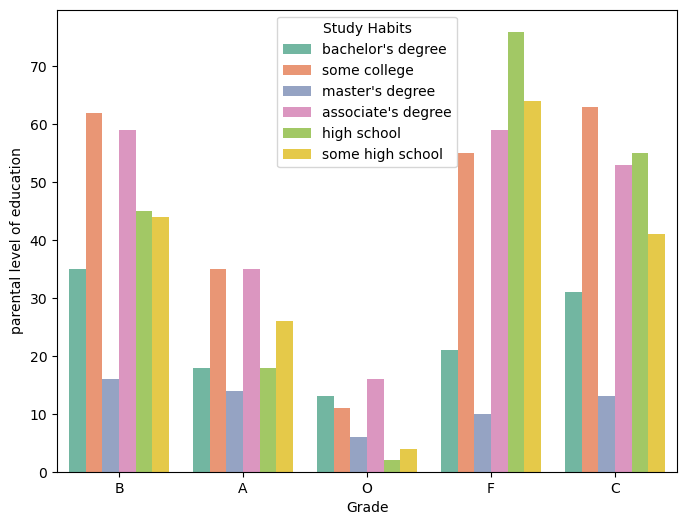

C:\Users\AFROZE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

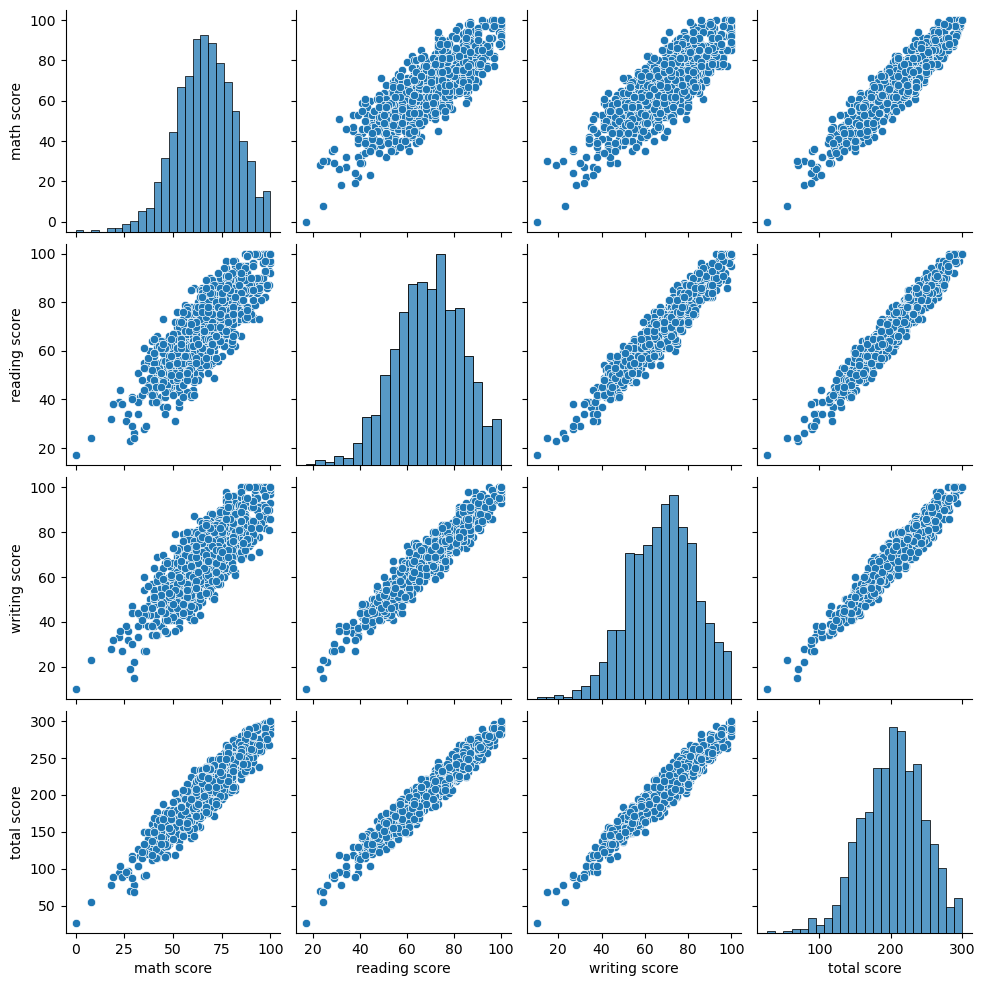

In [123]:
plt.scatter(df['reading score'], df['writing score'], color='blue')
plt.xlabel('Reading_Score')
plt.ylabel('Writing_Score')
plt.title('Relationship between Reading_Score and Writing_Score')
plt.show()

cols = ['math score', 'reading score', 'writing score','total score']
correlation_matrix = df[cols].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='percentage', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Percentage')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='parental level of education', y='total score', palette='Set2')
plt.xlabel('parental level of education')
plt.ylabel('total score')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Grade', hue='parental level of education', palette='Set2')
plt.xlabel('Grade')
plt.ylabel('parental level of education')
plt.show()
